<a href="https://colab.research.google.com/github/abhinabmondal/CSIR-CMERI/blob/main/DCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daily Customer Meter Data -Local Area Study

1. Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Mount GDrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Importing the Training Dataset

In [3]:
import csv

def transpose_csv(input_file, output_file):
    # Read the input CSV file
    with open(input_file, 'r') as file:
        reader = csv.reader(file)
        rows = list(reader)

    # Transpose the rows and columns
    transposed_rows = list(map(list, zip(*rows)))

    # Write the transposed data to a new CSV file
    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(transposed_rows)

    print(f"Transposed data saved to {output_file}")

# Example usage:
input_file = '/content/drive/MyDrive/CSIR-CMERI/Daily_m3_1315.csv'
output_file = 'transposed_data.csv'

transpose_csv(input_file, output_file)


Transposed data saved to transposed_data.csv


In [4]:
import pandas as pd

def read_csv_file(file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Return the DataFrame
    return df

# Example usage:
file_path = '/content/transposed_data.csv'
data_frame = read_csv_file(file_path)

# Display the DataFrame
print(data_frame)


            property         1       1.1         2         3         4  \
0     meter location  external  internal  external  external  internal   
1                DMA         1         1         1         1         1   
2         24/03/2012       NaN       NaN       NaN       NaN       NaN   
3         25/03/2012       NaN       NaN       NaN       NaN       NaN   
4         26/03/2012       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
1122      18/04/2015       NaN       NaN       NaN       NaN       NaN   
1123      19/04/2015       NaN       NaN       NaN       NaN       NaN   
1124      20/04/2015       NaN       NaN       NaN       NaN       NaN   
1125      21/04/2015       NaN       NaN       NaN       NaN       NaN   
1126      22/04/2015       NaN       NaN       NaN       NaN       NaN   

             5         6       6.1         7  ...      2153      2154  \
0     external  external  internal  ex

<ipython-input-4-9f41d6c44d7e>:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263

4. Imputation with Mean

In [5]:
import pandas as pd

def delete_header_and_save(file_path):
    # Read the CSV file into a pandas DataFrame, skipping the first row as header
    data = pd.read_csv(file_path, header=None, skiprows=2)

    # Save the modified data back to the original CSV file
    data.to_csv(file_path, index=False, header=False)

    print(f"Updated CSV saved to {file_path}")

    # Print the finally updated CSV
    print("Finally Updated CSV:")
    print(data)

# Example usage:
file_path = '/content/transposed_data.csv'

delete_header_and_save(file_path)

Updated CSV saved to /content/transposed_data.csv
Finally Updated CSV:
            0     1     2     3     4     5     6     7     8     9     ...  \
0            DMA   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   
1     24/03/2012   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2     25/03/2012   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3     26/03/2012   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4     27/03/2012   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1121  18/04/2015   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1122  19/04/2015   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1123  20/04/2015   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1124  21/04/2015   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1125  22/04/2015   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

In [6]:
import pandas as pd
import numpy as np

def apply_mean_imputation_and_save(file_path):
    # Read the updated CSV file into a pandas DataFrame, skipping the header row
    data = pd.read_csv(file_path)

    # Store the header separately
    header = data.columns.values

    # Modify the header to change float values in subsequent elements to the first digit
    for i in range(1, len(header)):
        col = header[i]
        try:
            float_val = float(col)
            header[i] = str(int(float_val)) if float_val % 1 != 0 else col
        except ValueError:
            pass

    # Drop the header for imputation
    data = data.iloc[1:, :]

    # Calculate the mean for each column, handling NaN values
    column_means = data.iloc[:, 1:].mean(skipna=True)

    # Apply mean imputation to the cells in the DataFrame
    data.iloc[:, 1:] = data.iloc[:, 1:].fillna(column_means)

    # Restore the modified header to the DataFrame
    data.columns = header

    # Save the updated DataFrame back to the original CSV file
    data.to_csv(file_path, index=False)

    print(f"Updated CSV saved to {file_path}")

    # Return the DataFrame with imputed values
    return data

# Example usage:
file_path = '/content/transposed_data.csv'

imputed_data = apply_mean_imputation_and_save(file_path)

# Display the DataFrame with imputed values
print(imputed_data)


Updated CSV saved to /content/transposed_data.csv
             DMA       1.0     1.0.1     1.0.2     1.0.3     1.0.4     1.0.5  \
1     25/03/2012  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
2     26/03/2012  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
3     27/03/2012  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
4     28/03/2012  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
5     29/03/2012  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
...          ...       ...       ...       ...       ...       ...       ...   
1120  18/04/2015  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
1121  19/04/2015  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
1122  20/04/2015  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
1123  21/04/2015  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
1124  22/04/2015  0.133732  0.082453  0.288506  0.209324  0.135481  0.

In [7]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/transposed_data.csv')

# Modify the header
header = df.columns.tolist()  # Convert the header to a list
modified_header = [header[0]] + [int(float(x.split('.')[0])) for x in header[1:]]

# Update the header in the DataFrame
df.columns = modified_header

# Save the modified DataFrame back to a CSV file
df.to_csv('/content/transposed_data.csv', index=False)


In [8]:
print(df)

             DMA         1         1         1         1         1         1  \
0     25/03/2012  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
1     26/03/2012  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
2     27/03/2012  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
3     28/03/2012  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
4     29/03/2012  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
...          ...       ...       ...       ...       ...       ...       ...   
1119  18/04/2015  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
1120  19/04/2015  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
1121  20/04/2015  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
1122  21/04/2015  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   
1123  22/04/2015  0.133732  0.082453  0.288506  0.209324  0.135481  0.368313   

             1         1         1  ...

Merging the Columns of 1 and 2

In [9]:
import numpy as np
import pandas as pd

# Read in the data
data = pd.read_csv('/content/transposed_data.csv')
x = data['1'].values
Y = data['2'].values
m = len(x)

# Display the result
print("x:", x)
print(type(x))
print("Y:", Y)
print(type(Y))
print("m:", m)


x: [0.13373231 0.13373231 0.13373231 ... 0.13373231 0.13373231 0.13373231]
<class 'numpy.ndarray'>
Y: [0.12370499 0.123      0.136      ... 0.142      0.122      0.12370499]
<class 'numpy.ndarray'>
m: 1124


In [10]:
# Transposing the data
def transpose_data(data):
    if isinstance(data, np.ndarray):
        return data.T.tolist()
    elif isinstance(data, (int, float)):
        return [[data]]
    else:
        raise ValueError("Unsupported data type.")

transposed_x = transpose_data(x)
transposed_Y = transpose_data(Y)

# Printing the transposed data
print("Transposed x:")
for row in transposed_x:
    print(row)

print("\nTransposed Y:")
for row in transposed_Y:
    print(row)


Transposed x:
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.1337323135755258
0.133732313575525

In [11]:
# Saving the transposed data to a CSV file
with open('transposed_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Transposed x:"])
    for row in transposed_x:
        if isinstance(row, (list, tuple)):
            writer.writerow(row)
        else:
            writer.writerow([row])
    writer.writerow([])  # Empty row
    writer.writerow(["Transposed Y:"])
    for row in transposed_Y:
        if isinstance(row, (list, tuple)):
            writer.writerow(row)
        else:
            writer.writerow([row])


In [12]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/New_Data.csv')

# Modify the column names in the header
header = df.columns.tolist()
header[1] = 'DMA1'
header[2] = 'DMA2'
df.columns = header

# Save the updated data to the CSV file
df.to_csv('/content/drive/MyDrive/New_Data.csv', index=False)

# Print the updated DataFrame
print(df)

            Date      DMA1      DMA2
0     26-03-2012  0.133732  0.123705
1     27-03-2012  0.133732  0.123000
2     28-03-2012  0.133732  0.136000
3     29-03-2012  0.133732  0.123000
4     30-03-2012  0.133732  0.096000
...          ...       ...       ...
1119  19-04-2015  0.133732  0.067000
1120  20-04-2015  0.133732  0.007000
1121  21-04-2015  0.133732  0.142000
1122  22-04-2015  0.133732  0.122000
1123         NaN  0.133732  0.123705

[1124 rows x 3 columns]


In [13]:
df = pd.read_csv('/content/drive/MyDrive/New_Data - New_Data.csv',parse_dates=True)
df.index.freq='MS'

In [14]:
df.head()

,Date,DMA1,DMA2
0,26-03-2012,0.133732,0.123705
1,27-03-2012,0.133732,0.123000
2,28-03-2012,0.133732,0.136000
3,29-03-2012,0.133732,0.123000
4,30-03-2012,0.133732,0.096000


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart.py:228: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  return pd.to_datetime(series)


import numpy as np
from google.colab import autoviz
df_3900632065603466636 = autoviz.get_registered_df('df_3900632065603466636')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3900632065603466636, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3544359831114920879 = autoviz.get_registered_df('df_3544359831114920879')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3544359831114920879, *['DMA2'], **{})
chart

import numpy as np
from google.colab import autoviz
df_783849729848483300 = autoviz.get_registered_df('df_783849729848483300')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_783849729848483300, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1933429666013043106 = autoviz.get_registered_df('df_1933429666013043106')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1933429666013043106, *['DMA2'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3472098419938779040 = autoviz.get_registered_df('df_3472098419938779040')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3472098419938779040, *[[['index', 'DMA2']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7329096794221132224 = autoviz.get_registered_df('df_7329096794221132224')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7329096794221132224, *['Date', 'DMA2', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7185988561227173998 = autoviz.get_registered_df('df_7185988561227173998')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7185988561227173998, *['Date', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_873356428136012190 = autoviz.get_registered_df('df_873356428136012190')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_873356428136012190, *['index', 'DMA2', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2165608558603435565 = autoviz.get_registered_df('df_2165608558603435565')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2165608558603435565, *['index', 'count()', None], **{})
chart

<Axes: >

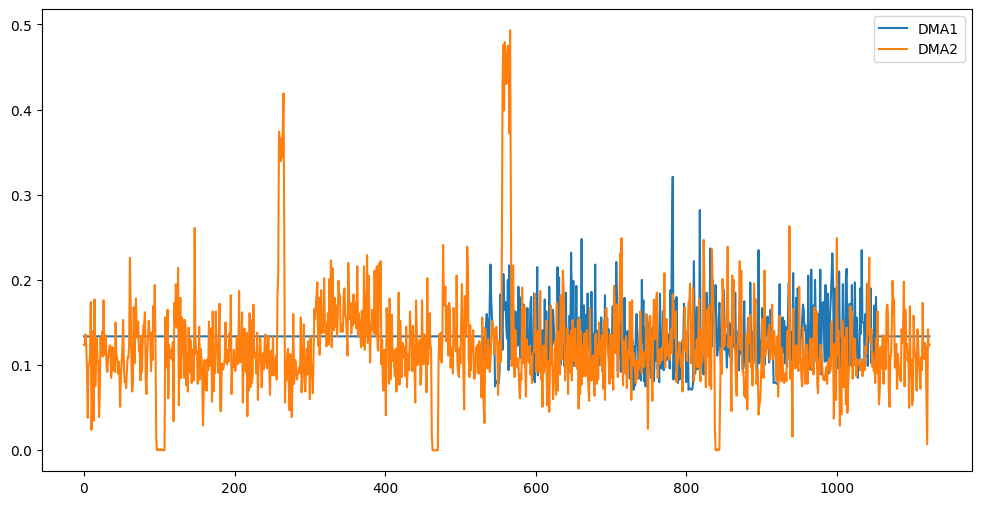

In [15]:
df.plot(figsize=(12,6))

<Axes: xlabel='Date'>

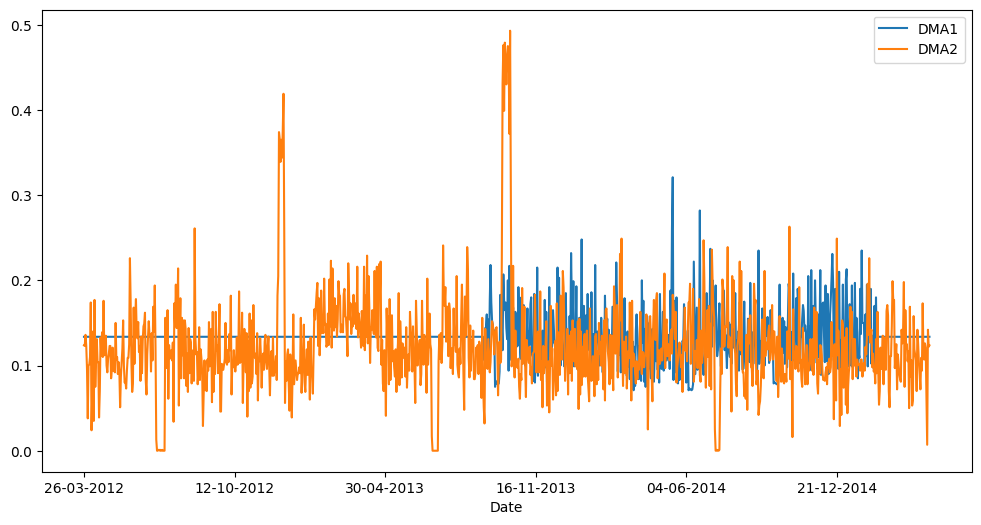

In [16]:
df.plot(x="Date", y=["DMA1", "DMA2"], figsize=(12, 6))

DF Plot for DMA1

<Axes: xlabel='Date'>

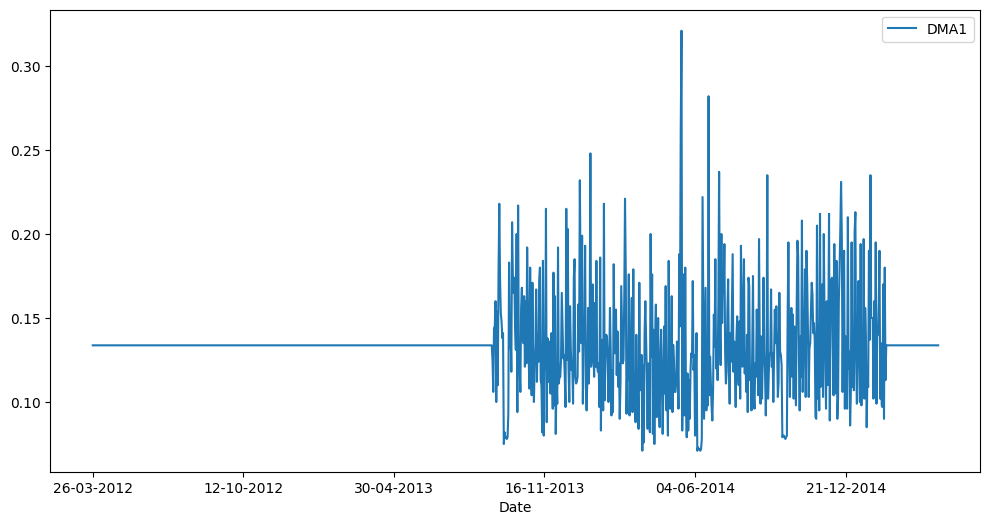

In [17]:
df.plot(x="Date", y=["DMA1"], figsize=(12, 6))

DF Plot for DMA2

<Axes: xlabel='Date'>

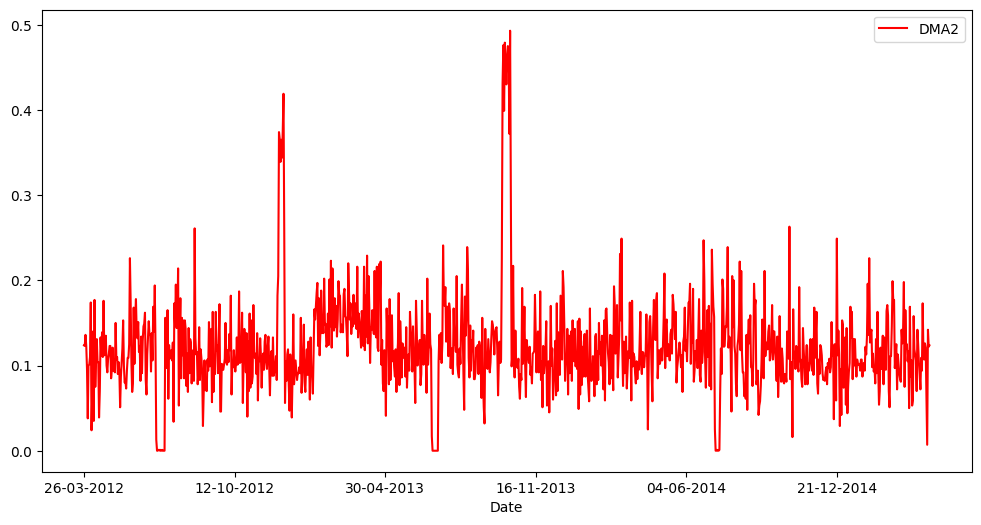

In [18]:
df.plot(x="Date", y=["DMA2"], figsize=(12, 6), color="red")

Multiplicative Decomposition

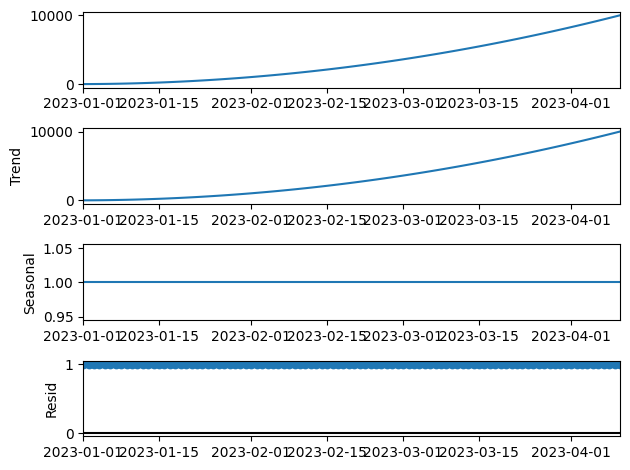

In [19]:
from pandas import Series, date_range
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
dates = date_range(start='2023-01-01', periods=100, freq='D')
series = Series([i**2.0 for i in range(1, 101)], index=dates)
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
pyplot.show()

In [20]:
len(df)

1124

In [21]:
train = df.iloc[:675]
test = df.iloc[675:]

5. Feature Scaling (Minmaxscaler)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
df.head(),df.tail()

(         Date      DMA1      DMA2
 0  26-03-2012  0.133732  0.123705
 1  27-03-2012  0.133732  0.123000
 2  28-03-2012  0.133732  0.136000
 3  29-03-2012  0.133732  0.123000
 4  30-03-2012  0.133732  0.096000,
             Date      DMA1      DMA2
 1119  19-04-2015  0.133732  0.067000
 1120  20-04-2015  0.133732  0.007000
 1121  21-04-2015  0.133732  0.142000
 1122  22-04-2015  0.133732  0.122000
 1123         NaN  0.133732  0.123705)

In [24]:
# load and summarize the dataset
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Load dataset
url = ("/content/drive/MyDrive/New_Data - New_Data.csv")
dataset = read_csv(url, header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())

pyplot.show()

(1125, 3)
           0            1     2
count   1124         1125  1125
unique  1124          144   215
top     Date  0.133732314   0.1
freq       1          601    19


In [25]:
# Convert string columns to numeric values before scaling
numeric_cols = train.select_dtypes(include=[np.number]).columns
non_numeric_cols = train.select_dtypes(exclude=[np.number]).columns

# Store the non-numeric column values
non_numeric_train = train[non_numeric_cols]
non_numeric_test = test[non_numeric_cols]

# Drop the non-numeric columns from the train and test sets
train = train.drop(columns=non_numeric_cols)
test = test.drop(columns=non_numeric_cols)

# Scale the numeric columns
scaler.fit(train[numeric_cols])
scaled_train_numeric = scaler.transform(train[numeric_cols])
scaled_test_numeric = scaler.transform(test[numeric_cols])

# Create DataFrames with the scaled numeric columns
scaled_train_numeric_df = pd.DataFrame(scaled_train_numeric, columns=numeric_cols)
scaled_test_numeric_df = pd.DataFrame(scaled_test_numeric, columns=numeric_cols)

# Concatenate the scaled numeric columns with the non-numeric columns
scaled_train = pd.concat([scaled_train_numeric_df, non_numeric_train], axis=1)
scaled_test = pd.concat([scaled_test_numeric_df, non_numeric_test], axis=1)


In [30]:
scaled_train[:10]

,DMA1,DMA2,Date
0,0.339493,0.250923,26-03-2012
1,0.339493,0.249493,27-03-2012
2,0.339493,0.275862,28-03-2012
3,0.339493,0.249493,29-03-2012
4,0.339493,0.194726,30-03-2012
5,0.339493,0.077079,31-03-2012
6,0.339493,0.202840,01-04-2012
7,0.339493,0.204868,02-04-2012
8,0.339493,0.223124,03-04-2012
9,0.339493,0.352941,04-04-2012


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart.py:228: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  return pd.to_datetime(series)


import numpy as np
from google.colab import autoviz
df_8586045954797739570 = autoviz.get_registered_df('df_8586045954797739570')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8586045954797739570, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2947964410277638525 = autoviz.get_registered_df('df_2947964410277638525')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2947964410277638525, *['DMA2'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6608528673038885169 = autoviz.get_registered_df('df_6608528673038885169')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6608528673038885169, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5488405013240430822 = autoviz.get_registered_df('df_5488405013240430822')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5488405013240430822, *['DMA2'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6114310715723615366 = autoviz.get_registered_df('df_6114310715723615366')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6114310715723615366, *[[['index', 'DMA2']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_1113487342064295433 = autoviz.get_registered_df('df_1113487342064295433')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1113487342064295433, *['Date', 'DMA2', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7995277422470890720 = autoviz.get_registered_df('df_7995277422470890720')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7995277422470890720, *['Date', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6379422187567953722 = autoviz.get_registered_df('df_6379422187567953722')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6379422187567953722, *['index', 'DMA2', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7766449962374593506 = autoviz.get_registered_df('df_7766449962374593506')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7766449962374593506, *['index', 'count()', None], **{})
chart

In [27]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [28]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

6. Create a Data Structure with 60 Timesteps and 1 output

In [ ]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
# Display the values
print("Given the Array:")
print(X.flatten())
print("Predict this y:")
print(y)

In [ ]:
X.shape

In [31]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

7. Importing keras libraries and packages

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

8.

In [33]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

9. Compile the RNN

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


10. Fit the RNN to the training set

In [ ]:
# fit model
model.fit(generator,epochs=50)

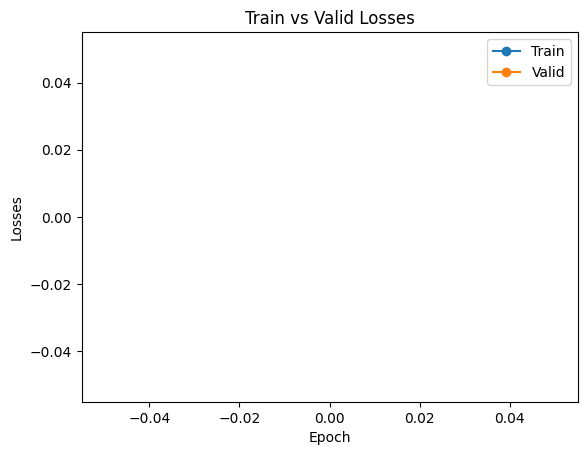

In [38]:
import matplotlib.pyplot as plt

# Assuming you have the training and validation losses stored in separate lists or arrays
train_losses = []  # Example training losses
eval_losses = []  # Example validation losses

# Plot the training and validation losses
plt.plot(train_losses, '-o')
plt.plot(eval_losses, '-o')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Train', 'Valid'])
plt.title('Train vs Valid Losses')
plt.show()


In [37]:
last_train_batch = scaled_train[-12:]

In [53]:
import numpy as np

# Assuming last_train_batch is a DataFrame-like object
last_train_batch_array = last_train_batch.values

# Ensure that the size of the array is compatible with the target shape
if last_train_batch_array.size == n_input * n_features:
    last_train_batch_reshaped = last_train_batch_array.reshape((1, n_input, n_features))

    # Continue with the reshaped array as needed
else:
    print("Error: The size of the array is incompatible with the target shape (1, {}, {}).".format(n_input, n_features))


Error: The size of the array is incompatible with the target shape (1, 12, 1).


In [54]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

AttributeError: ignored

In [55]:
model.predict(last_train_batch)

ValueError: ignored

In [ ]:
scaled_test[0]

In [52]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

AttributeError: ignored

In [ ]:
test_predictions

In [39]:
test.head()

,DMA1,DMA2
675,0.083,0.088
676,0.137,0.111
677,0.123,0.099
678,0.095,0.064
679,0.218,0.134


import numpy as np
from google.colab import autoviz
df_4137780139255582276 = autoviz.get_registered_df('df_4137780139255582276')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4137780139255582276, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4137780139255582276 = autoviz.get_registered_df('df_4137780139255582276')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4137780139255582276, *['DMA1'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4137780139255582276 = autoviz.get_registered_df('df_4137780139255582276')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4137780139255582276, *['DMA2'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4137780139255582276 = autoviz.get_registered_df('df_4137780139255582276')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4137780139255582276, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4137780139255582276 = autoviz.get_registered_df('df_4137780139255582276')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4137780139255582276, *['DMA1'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4137780139255582276 = autoviz.get_registered_df('df_4137780139255582276')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4137780139255582276, *['DMA2'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4137780139255582276 = autoviz.get_registered_df('df_4137780139255582276')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4137780139255582276, *[[['index', 'DMA1'], ['DMA1', 'DMA2']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_4137780139255582276 = autoviz.get_registered_df('df_4137780139255582276')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4137780139255582276, *['index', 'DMA1', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4137780139255582276 = autoviz.get_registered_df('df_4137780139255582276')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4137780139255582276, *['index', 'DMA2', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4137780139255582276 = autoviz.get_registered_df('df_4137780139255582276')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4137780139255582276, *['index', 'count()', None], **{})
chart

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

11. Visualize the results of predicted water demand data

<Axes: >

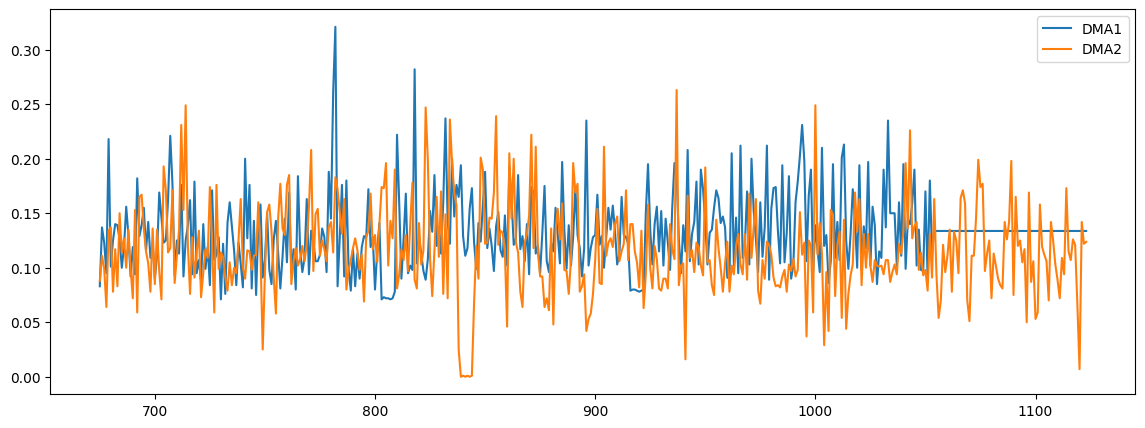

In [41]:
test.plot(figsize=(14,5))

In [47]:
test.plot( x="Date", y=["DMA1", "DMA2"], figsize=(14,5))

KeyError: ignored

<Axes: >

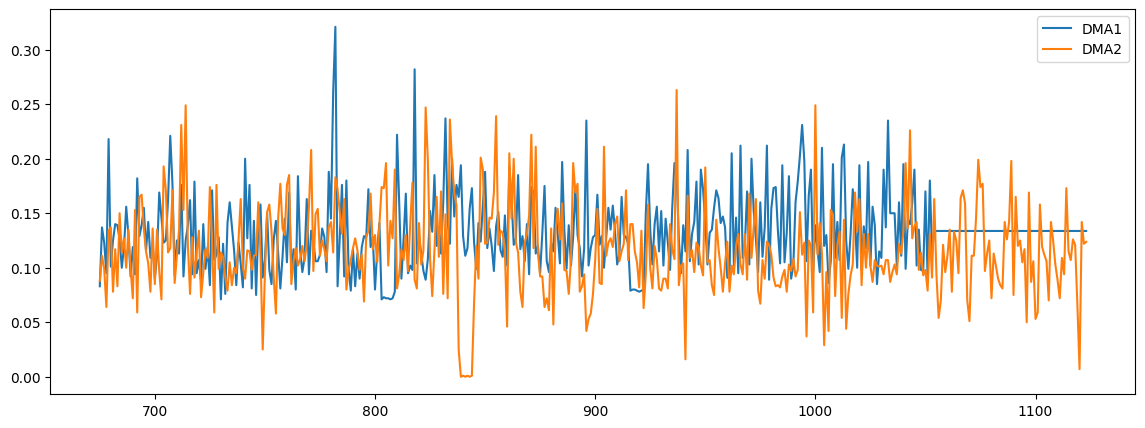

In [43]:
test.plot( y=["DMA1", "DMA2"], figsize=(14,5))

<Axes: >

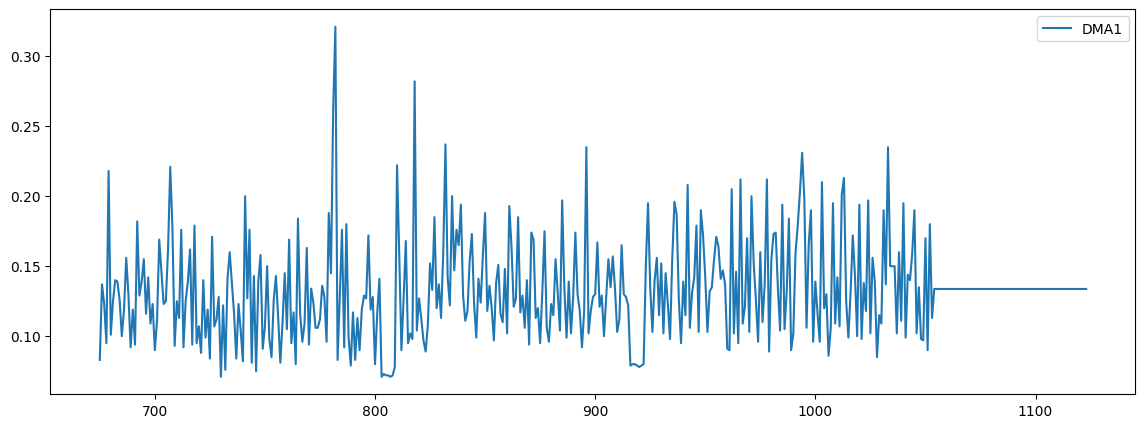

In [44]:
test.plot( y=["DMA1"], figsize=(14,5))

<Axes: >

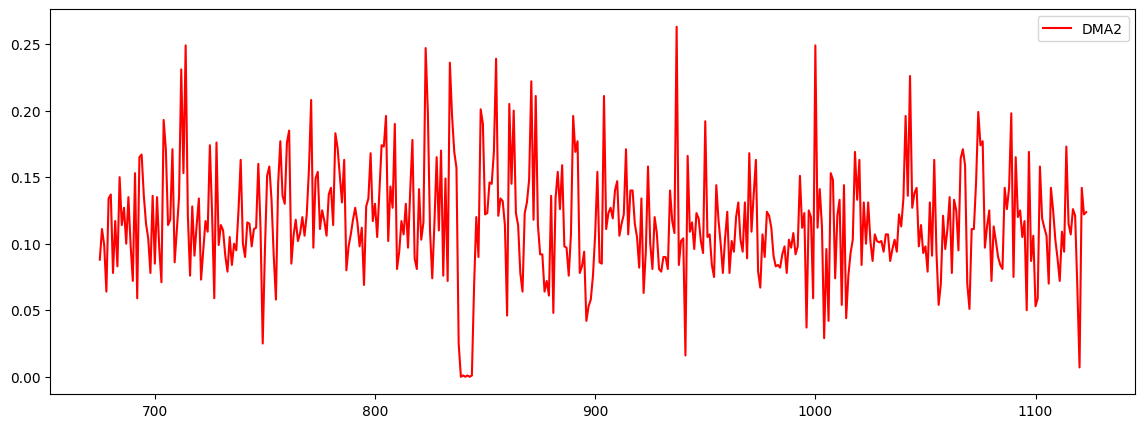

In [45]:
test.plot( y=["DMA2"], figsize=(14,5), color="red")

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['DMA1'],test['Predictions']))
rmse=sqrt(mean_squared_error(test['DMA2'],test['Predictions']))
print(rmse)

KeyError: ignored